In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def do_Kfold(model,X,y,k,scaler = None, random_state = 146):
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=k, random_state = random_state, shuffle=True)

    train_scores = []
    test_scores = []

    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain, :]
        Xtest = X[idxTest, :]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        model.fit(Xtrain,ytrain)

        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest))
        
    return train_scores, test_scores

In [3]:
def compare_classes(actual, predicted, names=None):
    '''Function returns a confusion matrix, and overall accuracy given:
            Input:  actual - a list of actual classifications
                    predicted - a list of predicted classifications
                    names (optional) - a list of class names
    '''
    accuracy = sum(actual==predicted)/actual.shape[0]
    
    classes = pd.DataFrame(columns = ['Actual', 'Predicted'])
    classes['Actual'] = actual
    classes['Predicted'] = predicted

    conf_mat = pd.crosstab(classes['Actual'], classes['Predicted'])
    
    if type(names) != type(None):
        conf_mat.index = names
        conf_mat.index.name = 'Actual'
        conf_mat.columns = names
        conf_mat.columns.name = 'Predicted'
    
    print('Accuracy = ' + format(accuracy, '.2f'))
    return conf_mat, accuracy

# Data Processing

Read in the data from the file arr_data_edit.csv. Following this, we will carry out some data processing steps.<br><br>
To answer the homework questions, you may wish to add in some code cells.<br><br>
<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Questions 1 and 2 based on this section</span>

In [4]:
part_one = pd.read_csv('arr_data_edit2.csv')#read in file

In [5]:
part_one.head()

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate,arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,63.0,8
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,53.0,6
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,75.0,10
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,71.0,1
4,13,0,169,51,100,167,321,174,91,107,66.0,52.0,88.0,84.0,14


In [6]:
part_one.shape

(428, 15)

Find the number of unique values and how often they occur for the variable `arrhythmia`.<br><br>
<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [7]:
part_one['arrhythmia'].value_counts()

arrhythmia
1     238
10     48
2      41
6      24
16     19
4      15
3      13
5      13
9       9
14      4
8       2
7       2
Name: count, dtype: int64

We are going to do a bit of processing. First look at how many observations are missing by column in the data frame.<br><br>
<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [8]:
part_one.isnull().sum()

Age           0
Sex           0
Height        0
Weight        0
QRS           0
PR            0
QT            0
T_wave        0
P_wave        0
QRS_angle     0
T_angle       8
P_angle       0
QRST_angle    0
Heart_Rate    0
arrhythmia    0
dtype: int64

We will first locate any observations missing a value for T_angle. Then, we will create a second data frame that excludes these observations. This is already done for you. Your job here is to keep track of the all of the different variable names.

In [9]:
missing_T = part_one[part_one['T_angle'].isnull()]
missing_T

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate,arrhythmia
63,54,1,160,63,82,158,410,141,87,25,NaN,62.0,39.0,54.0,2
88,64,1,155,88,82,194,342,138,126,-4,NaN,64.0,-1.0,85.0,4
190,70,1,160,90,76,187,396,155,121,-1,NaN,30.0,2.0,89.0,2
201,63,0,174,79,91,151,410,198,86,16,NaN,2.0,16.0,59.0,2
225,56,0,170,80,81,162,352,154,100,23,NaN,56.0,20.0,79.0,1
337,62,1,157,65,81,174,452,160,116,53,NaN,42.0,53.0,87.0,2
349,48,0,182,77,77,196,325,235,104,46,NaN,56.0,44.0,89.0,2
389,41,0,170,67,96,191,368,202,108,62,NaN,-52.0,62.0,63.0,16


In [10]:
part_one = part_one[part_one['T_angle'].notnull()].reset_index(drop = True)

In [11]:
part_one.shape

(420, 15)

We are also going to create a second data frame to use later. We will call it part two. Notice that there is a column in the original data frame called 'arrhythmia' - it has many possible values. We are going to create a  dichotomous variable with only two outcomes from this. The 0 outcome indicates no arrhythmia. The 1 outcome indicates an arrhythmia.

In [12]:
part_two = part_one.copy()
part_two['dicot'] = part_two['arrhythmia'].apply(lambda x: 0 if x==1 else 1)

In [13]:
part_two.head()

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate,arrhythmia,dicot
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,63.0,8,1
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,53.0,6,1
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,75.0,10,1
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,71.0,1,0
4,13,0,169,51,100,167,321,174,91,107,66.0,52.0,88.0,84.0,14,1


# Regression section

In [14]:
#Drop categorical variable before we start, we won't need it in this analysis
part_one.drop(columns = ['arrhythmia'], inplace= True)

### Exploratory Data Analysis

<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Questions 3,4,5 and 6 based on this section</span>

In this section, we are going to perform regression in order to predict the missing values of T_angle. This means, for this part of the assignment the <b>target</b> is <b>T_angle</b>. First, we will take a look at the data and calculate some descriptive statistics. 

<Axes: >

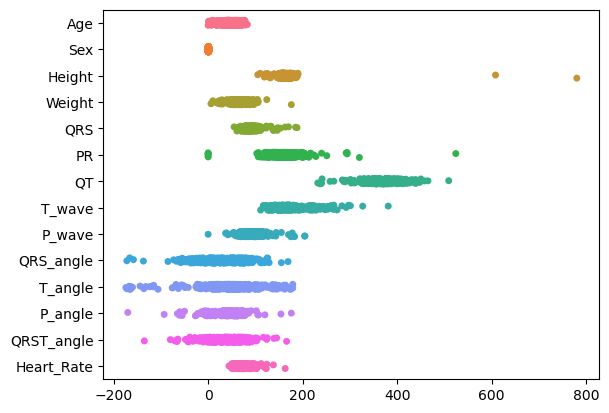

In [15]:
#Create a stripplot of the data 
sns.stripplot(data = part_one, orient = 'h')

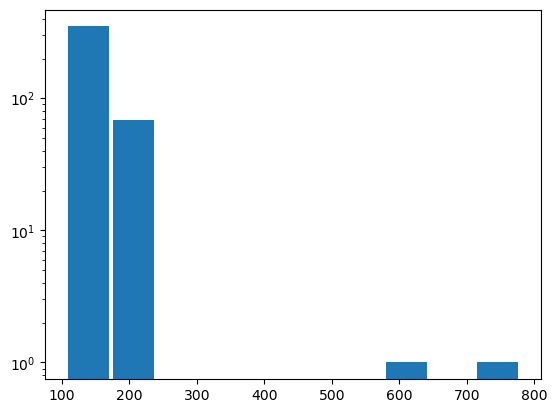

In [16]:
#Create a histogram for Height
part_one['Height'].hist(rwidth = 0.9)
plt.yscale('log')
plt.grid(None)

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [17]:
#Subset the data so that it only contains valid height observations
#Choose a cutoff

part_one_new = part_one[part_one['Height'] < 608]
part_one_new.sort_values(by="Height", ascending=False).head()

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,63.0
416,37,0,190,85,100,137,361,201,73,86,66.0,52.0,79.0,73.0
305,42,0,188,91,113,213,358,220,107,91,39.0,84.0,79.0,78.0
391,51,0,186,95,94,203,367,171,106,-7,57.0,61.0,32.0,71.0
118,58,0,186,18,87,166,372,150,96,-1,63.0,39.0,17.0,70.0


In [18]:
part_one.shape

(420, 14)

In [19]:
# find out if top two data points in height are outliers

outliers = part_one['Height'][part_one['Height'] >= 608]

def is_outlier(series: pd.Series):
    Q1 = series.describe().loc["25%"]
    Q3 = series.describe().loc["75%"]
    IQR = Q3 - Q1

    print("IQR:", IQR)
    print("upper bound:", Q3 + 1.5*IQR)
    print("lower bound:", Q1 - 1.5*IQR)
    return (series > Q3 + 1.5*IQR) | (series < Q1 - 1.5*IQR)

part_one['Height'].describe()

count    420.000000
mean     166.159524
std       38.496515
min      105.000000
25%      160.000000
50%      164.000000
75%      170.000000
max      780.000000
Name: Height, dtype: float64

In [20]:
is_outlier(part_one['Height']).value_counts()

IQR: 10.0
upper bound: 185.0
lower bound: 145.0


Height
False    399
True      21
Name: count, dtype: int64

<span style='color:red; font-weight:bold;font-size:1.5em'>MAKE NOTE: from this point forward in the regression section, you will be using part_one_new</span>
<br><br>
<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [21]:
#Calculate descriptive statistics T_angle
part_one['T_angle'].describe()

count    420.000000
mean      38.538095
std       55.196468
min     -174.000000
25%       15.000000
50%       42.000000
75%       63.250000
max      179.000000
Name: T_angle, dtype: float64

In [22]:
part_one['T_angle'][is_outlier(part_one['T_angle'])].sort_values(ascending=False)

IQR: 48.25
upper bound: 135.625
lower bound: -57.375


193    179.0
341    179.0
358    177.0
82     175.0
201    174.0
28     172.0
218    164.0
337    162.0
173    160.0
27     153.0
302    153.0
359    150.0
406    149.0
178    147.0
326    145.0
102    143.0
85     142.0
220    142.0
214    137.0
386    136.0
186    -63.0
385    -68.0
172    -75.0
351    -76.0
225   -106.0
365   -115.0
177   -115.0
279   -116.0
271   -121.0
84    -124.0
323   -132.0
81    -136.0
331   -144.0
235   -160.0
296   -163.0
72    -164.0
94    -165.0
168   -167.0
189   -172.0
273   -174.0
Name: T_angle, dtype: float64

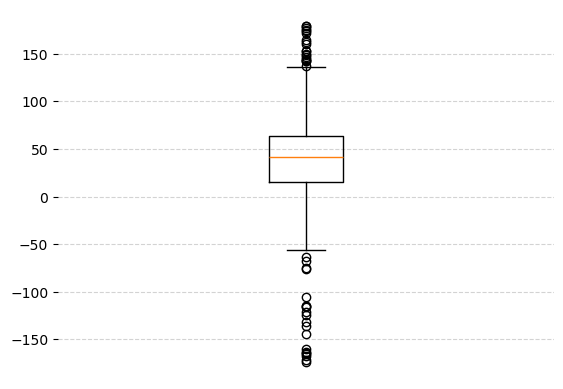

In [23]:
#Make a box plot
plt.boxplot(part_one_new['T_angle'])
ax = plt.gca()
[ax.spines[i].set_visible(False) for i in ax.spines]
plt.grid(axis = 'y', linestyle = '--', color = 'lightgrey')
plt.xticks([])
plt.show()

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [24]:
corr_matrix = np.corrcoef(part_one, rowvar=False)
corr_matrix[10]

array([ 0.03916898, -0.13340031, -0.00125803, -0.01019372,  0.0339811 ,
        0.01010868,  0.10242613,  0.04621471,  0.04610288, -0.039474  ,
        1.        , -0.01036956,  0.21932634, -0.01850234])

In [25]:
def create_correlation_heatmap(dataframe: pd.DataFrame):
    # 1. include only numerical columns
    numerical_df = dataframe[dataframe.select_dtypes(include='number', exclude='object').columns]

    # 2. drop na
    numerical_df = numerical_df.dropna()
    cols = list(numerical_df.columns)

    # 3. create correlation matrix
    corr_matrix = np.corrcoef(numerical_df[cols], rowvar=False)
    mask = np.triu(corr_matrix)

    # 4. plot
    sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1,
                annot=True, fmt='.2f', xticklabels=cols[:-1], yticklabels=['']+cols[1:],
            mask = mask,
               )
    plt.tick_params(size = 0, labelsize = 8)
    plt.xticks(rotation = 90)
    plt.show()

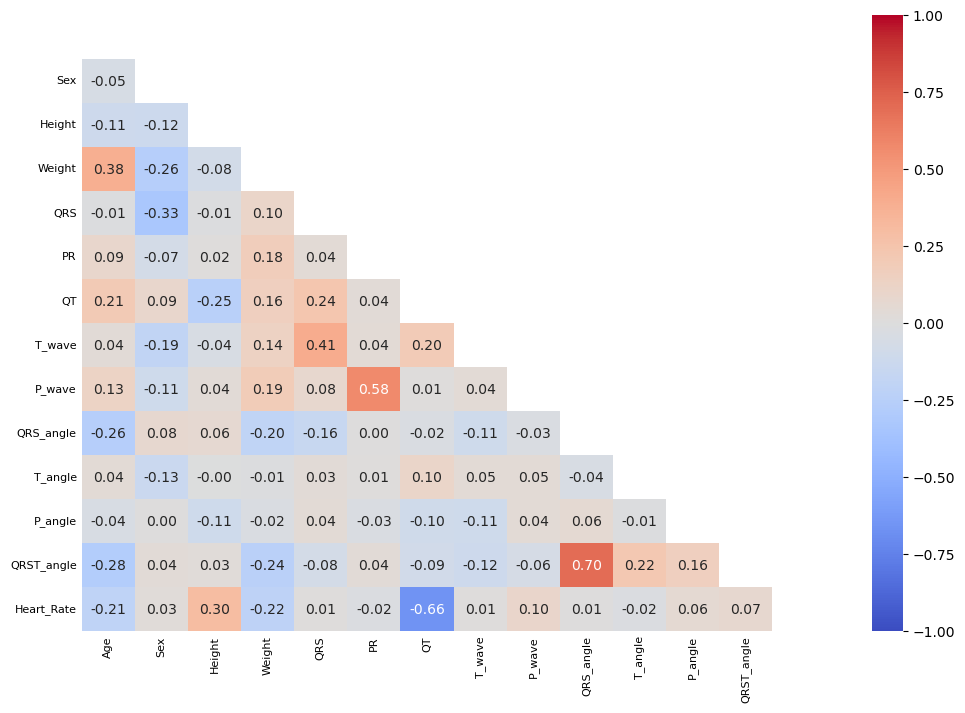

In [26]:
#Calculate correlation coefficients between all variables and the target
#HINT: It's easier just to calculate the whole matrix...DON'T use the heatmap

plt.figure(dpi=100, figsize=(12, 8))
create_correlation_heatmap(part_one)

### Lasso Regression

<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Questions 7,8, and 9 based on this section</span>

In [27]:
#build model
y = part_one_new['T_angle'].values
X = part_one_new.drop(columns = ['T_angle']).values

We will perform Lasso regression so that we can see which features might be dropped from the model. First, we will find the optimal value of alpha, then we will fit the model to ALL of the data.

In [28]:
#Let's do Lasso regression
from sklearn.linear_model import LinearRegression as LR, Lasso
from sklearn. preprocessing import StandardScaler as SS

In [29]:
#Use this range - increase the limits by 1 each time, so if you don't find a max go to 1.5 to 2.5, then 2.5 to 3.5 and so forth
a_range = np.linspace(0.5,3.5,500)
k = 10
ss = SS()

avg_tr_score=[]
avg_te_score=[]

for a in a_range:
    las_reg = Lasso(alpha=a)
    train_scores, test_scores = do_Kfold(las_reg, X, y, k, ss, random_state = 201)

    negative_test_scores = list(filter(lambda x: x < 0, test_scores))
    if len(negative_test_scores) > 0:
        print("found negative R^2 score")
    avg_tr_score.append(np.mean(train_scores))
    avg_te_score.append(np.mean(test_scores))

found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score
found negative R^2 score


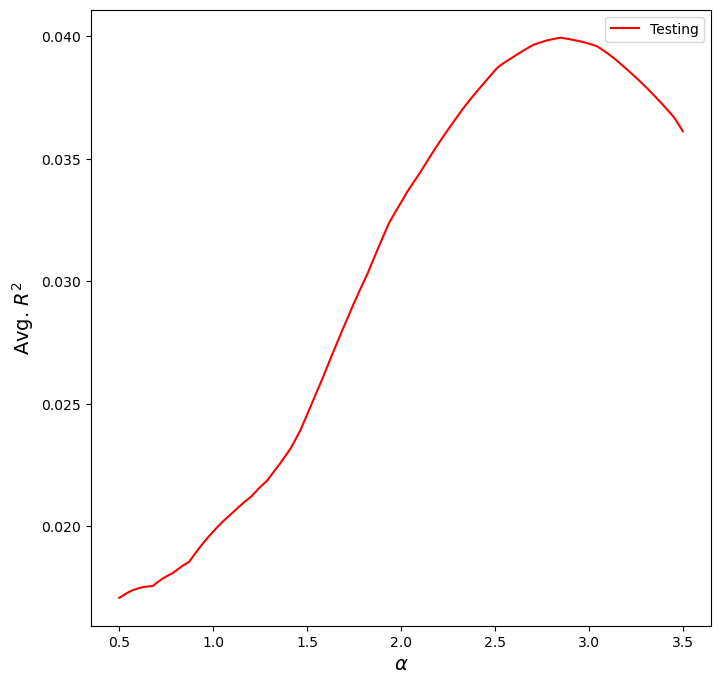

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
#plt.plot(a_range, avg_tr_score, color='k', label='Training')
plt.plot(a_range, avg_te_score, color='r', label='Testing')
plt.xlabel('$\\alpha$', fontsize=14)
plt.ylabel('Avg. $R^2$', fontsize=14)
plt.legend()
plt.show()

In [31]:
idx_max = np.argmax(avg_te_score)

print('Optimal alpha in the range tested: ', a_range[idx_max])
print('Avg. training score at this value: ', avg_tr_score[idx_max])
print('Avg. testing score at this value: ', avg_te_score[idx_max])

Optimal alpha in the range tested:  2.850701402805611
Avg. training score at this value:  0.14125966838125364
Avg. testing score at this value:  0.03994892918708711


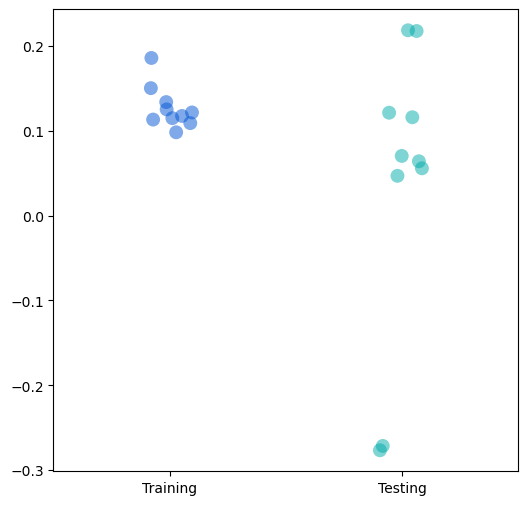

In [32]:
plt.figure(figsize = (6,6))
sns.stripplot(data = pd.DataFrame(zip(train_scores,test_scores), columns = ['Training', 'Testing']), size=10, palette = 'winter',
             alpha = 0.5, jitter = True)
plt.show()

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [33]:
#build a model with ALL of the data
#create the Regressor
#use the optimal value of alpha you found above
las_reg = Lasso(alpha=2.85)

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [34]:
#do the appropriate scaling
#fit and score the lasso regression
ss = SS()
X_scaled = ss.fit_transform(X)

las_reg.fit(X_scaled, y)
las_reg.score(X_scaled, y)

0.13631406749563646

In [35]:
pd.Series(las_reg.coef_, index = part_one_new.drop(columns = ['T_angle']).columns)
#Which features go set to 0?

Age            0.248132
Sex           -4.774187
Height         0.000000
Weight        -0.000000
QRS           -0.000000
PR            -0.000000
QT             4.504393
T_wave         0.000000
P_wave         0.000000
QRS_angle    -11.408841
P_angle       -0.000000
QRST_angle    17.967987
Heart_Rate     0.000000
dtype: float64

In [36]:
#Now we will use the model to predict our missing values
for_pred = missing_T.drop(columns = ['T_angle', 'arrhythmia']).values
for_pred

array([[ 54.,   1., 160.,  63.,  82., 158., 410., 141.,  87.,  25.,  62.,
         39.,  54.],
       [ 64.,   1., 155.,  88.,  82., 194., 342., 138., 126.,  -4.,  64.,
         -1.,  85.],
       [ 70.,   1., 160.,  90.,  76., 187., 396., 155., 121.,  -1.,  30.,
          2.,  89.],
       [ 63.,   0., 174.,  79.,  91., 151., 410., 198.,  86.,  16.,   2.,
         16.,  59.],
       [ 56.,   0., 170.,  80.,  81., 162., 352., 154., 100.,  23.,  56.,
         20.,  79.],
       [ 62.,   1., 157.,  65.,  81., 174., 452., 160., 116.,  53.,  42.,
         53.,  87.],
       [ 48.,   0., 182.,  77.,  77., 196., 325., 235., 104.,  46.,  56.,
         44.,  89.],
       [ 41.,   0., 170.,  67.,  96., 191., 368., 202., 108.,  62., -52.,
         62.,  63.]])

In [37]:
las_reg.predict(ss.transform(for_pred))

array([43.62517346, 21.53296184, 30.00230889, 44.20807784, 36.1429759 ,
       49.6664129 , 38.38824382, 49.31034746])

The next code cell fills in this value for the NaN in the observation.

In [38]:
missing_T['T_angle'] = las_reg.predict(ss.transform(for_pred))

# Let's do some classification

We will use the part_two data set we made at the beginning for classification. There is some code added here to add the observations we just imputed T_angle for to the part_two data set. You can just run it as is. You should end up with 428 observations total.

In [39]:
missing_T['dicot'] =  missing_T['arrhythmia'].apply(lambda x: 0 if x==1 else 1)
missing_T

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate,arrhythmia,dicot
63,54,1,160,63,82,158,410,141,87,25,43.625173,62.0,39.0,54.0,2,1
88,64,1,155,88,82,194,342,138,126,-4,21.532962,64.0,-1.0,85.0,4,1
190,70,1,160,90,76,187,396,155,121,-1,30.002309,30.0,2.0,89.0,2,1
201,63,0,174,79,91,151,410,198,86,16,44.208078,2.0,16.0,59.0,2,1
225,56,0,170,80,81,162,352,154,100,23,36.142976,56.0,20.0,79.0,1,0
337,62,1,157,65,81,174,452,160,116,53,49.666413,42.0,53.0,87.0,2,1
349,48,0,182,77,77,196,325,235,104,46,38.388244,56.0,44.0,89.0,2,1
389,41,0,170,67,96,191,368,202,108,62,49.310347,-52.0,62.0,63.0,16,1


In [40]:
part_two.head()

,Age,Sex,Height,Weight,QRS,PR,QT,T_wave,P_wave,QRS_angle,T_angle,P_angle,QRST_angle,Heart_Rate,arrhythmia,dicot
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,63.0,8,1
1,56,1,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,53.0,6,1
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,75.0,10,1
3,55,0,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,71.0,1,0
4,13,0,169,51,100,167,321,174,91,107,66.0,52.0,88.0,84.0,14,1


In [41]:
part_two = pd.concat([part_two, missing_T]).reset_index(drop = True)

In [42]:
part_two['dicot'].value_counts()

dicot
0    238
1    190
Name: count, dtype: int64

In [43]:
part_two.isnull().sum()

Age           0
Sex           0
Height        0
Weight        0
QRS           0
PR            0
QT            0
T_wave        0
P_wave        0
QRS_angle     0
T_angle       0
P_angle       0
QRST_angle    0
Heart_Rate    0
arrhythmia    0
dicot         0
dtype: int64

### PCA and tSNE

First, we will do PCA and tSNE just to look at the data.<br>

<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Question 10 based on this section</span>

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
for_pca = part_two.drop(columns = ['arrhythmia', 'dicot'])
#do the PCA, be sure to scale the data

pca_X = pca.fit_transform(for_pca)
pca.explained_variance_ratio_

array([2.30730375e-01, 2.12049099e-01, 1.24461286e-01, 1.13037516e-01,
       9.58580002e-02, 7.00139361e-02, 5.45134952e-02, 2.95691072e-02,
       2.08685607e-02, 1.87915904e-02, 1.30472038e-02, 1.11399804e-02,
       5.90711189e-03, 1.27387372e-05])

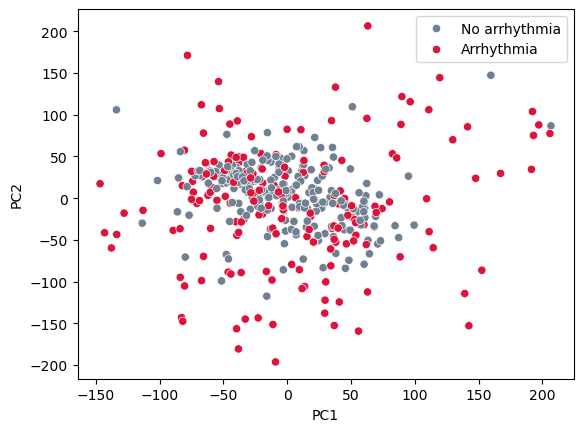

In [45]:
#plot PCA results
pca_df = pd.DataFrame(pca_X[:,:2], columns  = ['PC1','PC2'])
pca_df['target'] = part_two['dicot']
ax = sns.scatterplot(data = pca_df, x = 'PC1', y = 'PC2', hue = 'target', palette = ['slategrey','crimson'])
plt.legend(ax.get_legend_handles_labels()[0], ['No arrhythmia', 'Arrhythmia'])
plt.show()

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [46]:
from sklearn.manifold import TSNE
#perform the tSNE with default perplexity and random_state 42

tsne = TSNE(random_state=42)
tsne_X = tsne.fit_transform(for_pca)

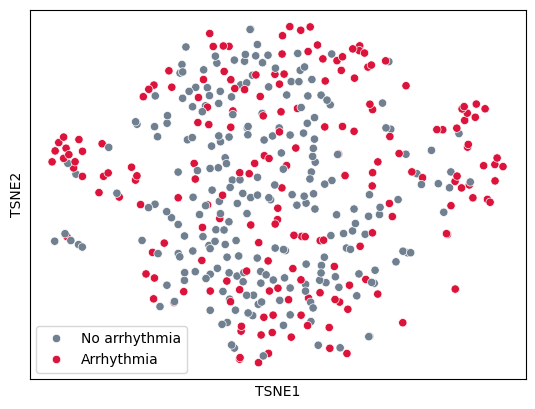

In [47]:
tsne_df = pd.DataFrame(tsne_X[:,:2], columns  = ['TSNE1','TSNE2'])
tsne_df['target'] = part_two['dicot']
ax = sns.scatterplot(data = tsne_df, x = 'TSNE1', y = 'TSNE2', hue = 'target', palette = ['slategrey','crimson'])
plt.legend(ax.get_legend_handles_labels()[0], ['No arrhythmia', 'Arrhythmia'])
plt.xticks([])
plt.yticks([])
plt.show()

## Classification

We will fit a variety of classifiers on a single tts to see how they perform. For the KNN and RFC, we will optimize hyperparameters.

In [48]:
X = part_two.drop(columns = ['arrhythmia', 'dicot']).values
X_names = part_two.drop(columns = ['arrhythmia', 'dicot']).columns
y = part_two['dicot'].values

### KNN Hyperparameter Optimization

<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Question 11 based on this section</span>

In [49]:
from sklearn.neighbors import KNeighborsClassifier as KNN
neighbor_range = np.array(range(2,13))

train=[]
test=[]

k = 50

for n_neighbors in neighbor_range:
    knn = KNN(n_neighbors=n_neighbors, weights = 'distance')
    tr,te = do_Kfold(knn,X,y,k, SS())
    
    train.append(np.mean(tr))
    test.append(np.mean(te))


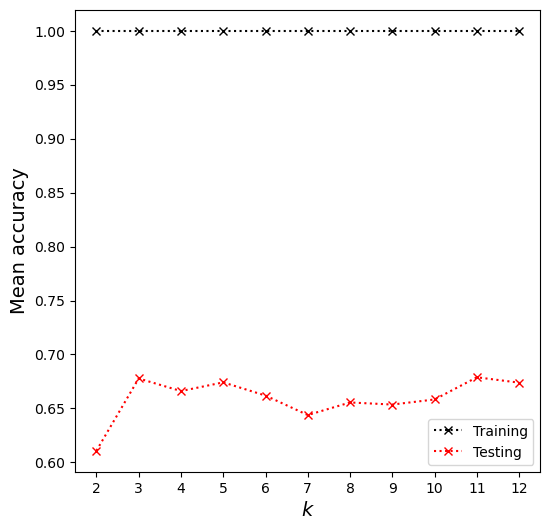

In [50]:
plt.figure(figsize=(6,6))
plt.plot(neighbor_range, train, ':xk', label='Training')
plt.plot(neighbor_range, test, ':xr', label='Testing')
plt.ylabel('Mean accuracy', fontsize=14)
plt.xlabel('$k$',fontsize=14)
plt.xticks(neighbor_range)
plt.legend()
plt.show()

In [51]:
idx = np.argmax(test)
print(idx)
print(neighbor_range[idx])
print(np.max(test))
print(np.max(train))

9
11
0.6788888888888889
1.0


### KNN vs Logistic Regression one tts

We will now create a train test split that we will use to compare all of our classifiers. We will start by comparing KNN and Logistic Regression. <br><br>
<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Question 12 based on this comparison, be sure you are using the single tts created below</span>

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [52]:
#one tts
from sklearn.model_selection import train_test_split as tts
Xtrain, Xtest, ytrain, ytest = tts(X,y,random_state = 201, shuffle = True, test_size = 0.2)
ss = SS()
#scale the testing and training data appropriately
XtrainS = ss.fit_transform(Xtrain)
XtestS = ss.transform(Xtest)

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [53]:
#Use the number of neighbors determined above and the weighting scheme used for the optimization
#fit the KNN classifier and score it on train

knn = KNN(n_neighbors=11, weights = 'distance')
knn.fit(XtrainS, ytrain)
knn.score(XtrainS, ytrain)

1.0

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [54]:
#Generate a confusion matrix for the scaled test data
y_pred = knn.predict(XtestS)
cf, accuracy = compare_classes(ytest, y_pred, names=['not aryhtmia', 'arrythmia', ])
print(accuracy)
cf

Accuracy = 0.65
0.6511627906976745


Predicted,not aryhtmia,arrythmia
Actual,,
not aryhtmia,41,6
arrythmia,24,15


### Logistic regression

We won't tune the hyperparameter here.

In [55]:
#Let's try logistic regression
from sklearn.linear_model import LogisticRegression as LogR

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [56]:
#perform logistic regression on the scaled training data and score on train and test
log_reg = LogR()
log_reg.fit(XtrainS, ytrain)
log_reg.score(XtrainS, ytrain)

0.695906432748538

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [57]:
#Generate a confusion matrix for the scaled test data
y_pred = log_reg.predict(XtestS)
cf, accuracy = compare_classes(ytest, y_pred, names=['not aryhtmia', 'arrythmia', ])
print(accuracy)
cf

Accuracy = 0.71
0.7093023255813954


Predicted,not aryhtmia,arrythmia
Actual,,
not aryhtmia,39,8
arrythmia,17,22


### Random Forest Classifier

<span style = "color:blue;font-weight:bold;font-size:large;">You will answer Questions 13, 14, and 15 based on this section</span>

We will use the grid search to optimize a few hyperparameters for our RFC before we try it out on the train test split. We will look at a hyperparameter we haven't seen before: max_leaf_nodes - this limits the number of leaves each decision tree can have.

In [58]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import KFold, GridSearchCV

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [64]:
#Create a gridsearchCV to test 100,500,1000 trees and min_samples_split of 20,30,40
param_grid = {
    'n_estimators': [100, 500, 1000],
    'min_samples_split': [20,30,40]
}

#use 10 folds
cv = KFold(n_splits=10, random_state=201, shuffle=True)
model = RFC(random_state=201)

#create the gridsearchCV object, score on accuracy
grid = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=cv)

#fit the gridsearch
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=KFold(n_splits=10, random_state=201, shuffle=True),
             estimator=RandomForestClassifier(random_state=201),
             param_grid={'min_samples_split': [20, 30, 40],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy')

<span style="color:red;font-size:large">You have to fill something in in the next code cell</span>

In [65]:
#Look at the gridsearch results - be sure to look at the parameter values 
#as well as the mean test scores and their ranks

grid.best_estimator_

RandomForestClassifier(min_samples_split=30, n_estimators=1000,
                       random_state=201)

In [61]:
grid.cv_results_

{'mean_fit_time': array([0.23829367, 1.0689384 , 2.01947384, 0.19543004, 0.96830862,
        1.93796952, 0.18696084, 0.94314644, 1.91562099]),
 'std_fit_time': array([0.02807017, 0.0753278 , 0.02055516, 0.00512505, 0.00984189,
        0.04761061, 0.00153336, 0.01383567, 0.04434558]),
 'mean_score_time': array([0.00867743, 0.03254583, 0.05912101, 0.00698998, 0.03036315,
        0.05784087, 0.00658045, 0.02847481, 0.05807374]),
 'std_score_time': array([1.30885891e-03, 3.94606566e-03, 3.48004315e-03, 6.44777148e-04,
        3.48421804e-03, 4.09961283e-03, 5.88318509e-05, 3.80108700e-04,
        6.66563353e-03]),
 'param_min_samples_split': masked_array(data=[20, 20, 20, 30, 30, 30, 40, 40, 40],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 500, 1000, 100, 500, 1000, 100, 500, 1000],
              mask=[False, False, False, False, Fal

In [62]:
print(
    f'The best parameters are {grid.best_params_} with a score of {grid.best_score_:.2f}'
)

The best parameters are {'min_samples_split': 30, 'n_estimators': 1000} with a score of 0.75


In [66]:
grid.score(Xtest, ytest)

0.7906976744186046

In [67]:
grid.best_score_

0.7515966386554622

In [70]:
def create_grid_score_df(grid):
    param_combinations = grid.cv_results_["params"]
    scores = grid.cv_results_["mean_test_score"]
    index = [str(param_combo) for param_combo in param_combinations]

    df = pd.DataFrame(index=index, data={"Scores": scores})
    return df

In [72]:
grid_df = create_grid_score_df(grid)
grid_df[grid_df['Scores'] > .751]

,Scores
"{'min_samples_split': 20, 'n_estimators': 500}",0.751513
"{'min_samples_split': 20, 'n_estimators': 1000}",0.751513
"{'min_samples_split': 30, 'n_estimators': 1000}",0.751597
"{'min_samples_split': 40, 'n_estimators': 1000}",0.751597


Select the optimal parameters from the grid search. In the case of ties, use the value that results in a less complex classifier - for example if max_leaf_nodes were tied at 10 and 15, we would use 10 (that prunes the tree more). You should ask for help if you don't understand how the hyperparameters constrain the tree. 

<span style="color:red;font-size:large">You have to fill something in in the next three code cells</span>

In [73]:
#create the rfc using the optimal parameters defined above and random_state 201
rfc = RFC(random_state=201, min_samples_split=40, n_estimators=1000)

In [74]:
#fit the rfc
rfc.fit(Xtrain, ytrain)

RandomForestClassifier(min_samples_split=40, n_estimators=1000,
                       random_state=201)

In [75]:
#score on the training and testing data from the single tts we made above

train_score = rfc.score(Xtrain, ytrain)
test_score = rfc.score(Xtest, ytest)
print(train_score)
print(test_score)

0.8508771929824561
0.7906976744186046


<span style="color:red;font-size:large">You have to fill something in in the next two code cells</span>

In [79]:
def report(Xtest, ytest, names, model):
    y_pred = model.predict(Xtest)
    cf, accuracy = compare_classes(ytest, y_pred, names=names)
    print(accuracy)
    return cf

In [81]:
#Generate the confusion matrix for the training data

confusion_matrix = report(Xtrain, ytrain, ['not aryhtmia', 'arrythmia'], rfc)
confusion_matrix

Accuracy = 0.85
0.8508771929824561


Predicted,not aryhtmia,arrythmia
Actual,,
not aryhtmia,169,22
arrythmia,29,122


In [82]:
#Generate the confusion matrix for the test data

confusion_matrix = report(Xtest, ytest, ['not aryhtmia', 'arrythmia'], rfc)
confusion_matrix

Accuracy = 0.79
0.7906976744186046


Predicted,not aryhtmia,arrythmia
Actual,,
not aryhtmia,39,8
arrythmia,10,29


array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1])